In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
def draw_line(coef,intercept, mi, ma):
  points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
  plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

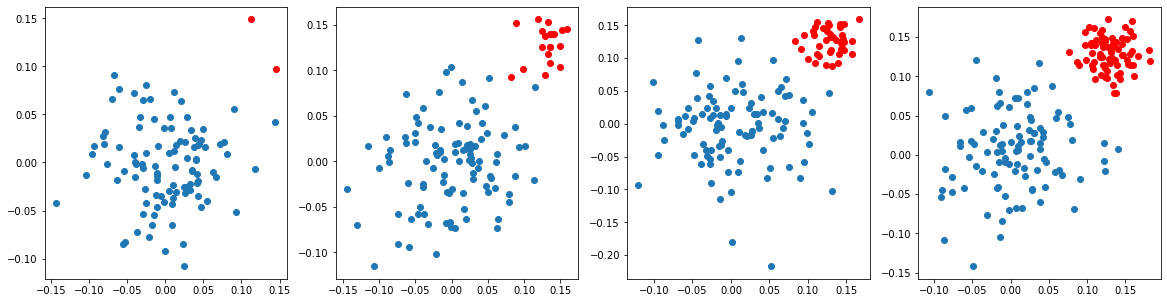

In [4]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

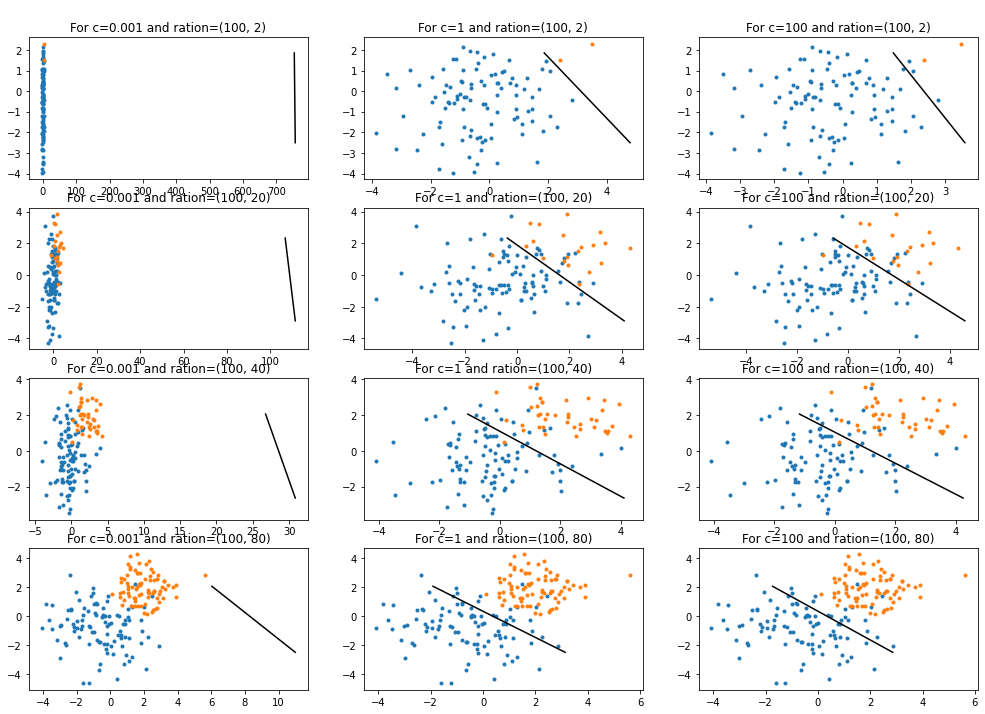

<Figure size 720x720 with 0 Axes>

In [5]:
fig,axs=plt.subplots(nrows=4,ncols=3,figsize=(17,12))
C_=[0.001, 1, 100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(10,10))
scaler = StandardScaler()
for idx,shape in enumerate(ratios):
  X_p=np.random.normal(-0.5,1.5,size=(shape[0],2))
  X_n=np.random.normal(2,1,size=(shape[1],2))
  X=np.vstack((X_p,X_n))
  y_p=np.array([1]*shape[0]).reshape(-1,1)
  y_n=np.array([0]*shape[1]).reshape(-1,1)
  y=np.vstack((y_p,y_n))
  X=scaler.fit_transform(X)

  for j,c in enumerate(C_):## ITERATING OVER DIFFERENT VALUES OF C_(REGULARISATION PARAMETER)
    classifier=SVC(C=c,kernel='linear') #DEFINING CLASSIFIER FOR SVC
    classifier.fit(X,y)                 #APPLYING SUPPORT VECTOR CLASSIFIER
    coef=classifier.coef_[0]            ##WEIGHTS
    intercept=classifier.intercept_     ##INTERCEPT
    axs[idx,j].scatter(X_p[:,0],X_p[:,1],marker='.') ## SCATTER PLOT FOR POSITIVE CLASS 
    axs[idx,j].scatter(X_n[:,0],X_n[:,1],marker='.') ## SCATTER PLOT FOR NEGITIVE CLASS
    axs[idx,j].set_title("\nFor c={} and ration={}".format(c,shape),)
  

    mi,ma=np.min(X[:,0]),np.max(X[:,1]) ## DEFINING RANGE FOR HIPERPLANE
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    axs[idx,j].plot(points[:,0],points[:,1],color='black') ## PLOTING HYPERPLANE 






## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

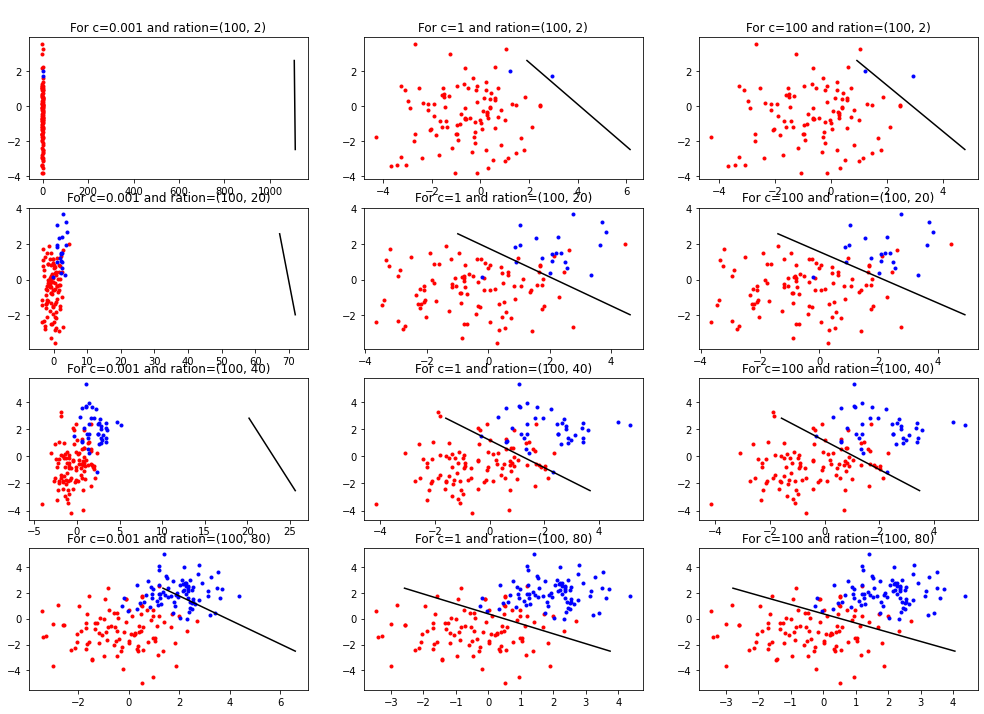

<Figure size 720x720 with 0 Axes>

In [6]:
fig,axs=plt.subplots(nrows=4,ncols=3,figsize=(17,12))
C_=[0.001, 1, 100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
scaler = StandardScaler()
plt.figure(figsize=(10,10))
for idx,shape in enumerate(ratios):
  X_p=np.random.normal(-0.5,1.5,size=(shape[0],2))
  X_n=np.random.normal(2,1,size=(shape[1],2))
  X=np.vstack((X_p,X_n))
  y_p=np.array([1]*shape[0]).reshape(-1,1)
  y_n=np.array([0]*shape[1]).reshape(-1,1)
  y=np.vstack((y_p,y_n))
  X=scaler.fit_transform(X)

  for j,c in enumerate(C_):## ITERATING OVER DIFFERENT VALUES OF C_(REGULARISATION PARAMETER)
    classifier=LogisticRegression(C=c,) #DEFINING CLASSIFIER FOR SVC
    classifier.fit(X,y)                 #APPLYING SUPPORT VECTOR CLASSIFIER
    coef=classifier.coef_[0]            ##WEIGHTS
    intercept=classifier.intercept_     ##INTERCEPT
    axs[idx,j].scatter(X_p[:,0],X_p[:,1],marker='.',color='r') ## SCATTER PLOT FOR POSITIVE CLASS 
    axs[idx,j].scatter(X_n[:,0],X_n[:,1],marker='.',color='b') ## SCATTER PLOT FOR NEGITIVE CLASS 
    axs[idx,j].set_title("\nFor c={} and ration={}".format(c,shape),)

    mi,ma=np.min(X[:,0]),np.max(X[:,1]) ## DEFINING RANGE FOR HIPERPLANE
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    axs[idx,j].plot(points[:,0],points[:,1],color='black') ## PLOTING HYPERPLANE


AS WE KNOW W* ,b* = argmax(2/||W||) = MARGIN MAXIMISATION 
= argmin (|W|/2) + C * Summation(error(i))/n where (1 =< i < n)
SUCH THAT yi(w.xi + b) >= 1 - error(i) where error >=0 

In [ ]:
Conclusion:
FROM ABOVE FORMULATION WE KNOW HYPERPARAMETER C IS A MEASURE OF PENALTY GIVEN PER MISCLASSIFICAION AS C INCREASES MISCLASSIFICAION ARE PENALISED HEAVILY /
HENCE MISCLASSIFICATION REDUCES AND REVERSE HAPPEN IN CASE OF LOW VALUE OF C .BUT IN CASE OF CLASS IMBALANCE MODEL TEND TO INCREASE PERFORMACE BASED ON
MAJORITY CLASS AND IGNORING MINORITY CLASS DUE TO SEVERE IMBALANCE. HERE C= 0.001 MEANS VERY LOW PENALTY i.e HIGH BIAS ,MODEL IS TOO SIMPLE IT DOES NOT 
EVEN CLASSIFY BUT AS C VALUE RISES FROM 0.001 --> 1 --> 100 IT START SHOWING LITTLE IMPROVEMENT BUT IT IS STILL A DUMB MODEL DUE TO CLASS IMBALANCE

2) NOW IF WE INCREASE NOT ONLY C BUT CHANGE PROPORATION OF MAJORITY AND MINORITY MODEL SHOWED SIGNIFICANT IMPROVEMENT IN CASES WHERE CLASS IMBALANCE IS NOT 
SEVERE AS WE CAN SEE IN CASE WHERE C=100 AND RATIO IS 100:80 BUT IN CASE OF SVM ,IF WE KEEP RATIO SAME AS CLASS IMBALANCE RATIO 100:80 BUT C IS  INCREASE FROM C=1 TO C=100 ,
THE SLOPE  DOES NOT CHANGE HENCE VERY HIGH C VAUE IS NOT DOING GOOD JOB

